Graphical Method (2 variables)

1. Maximize profit from chairs (x) and tables (y):

  Maximize Z=30x+20y

  Subject to:

  2x+y≤6(carpentry)

  x+y≤4 (painting)

  x≥0,y≥0

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#Constraints
x=np.linspace(0,10,200)
y1=6-2*x # 2x+y <= 6 (Carpentry)
y2=4-x #x+y<=4 (Painting)

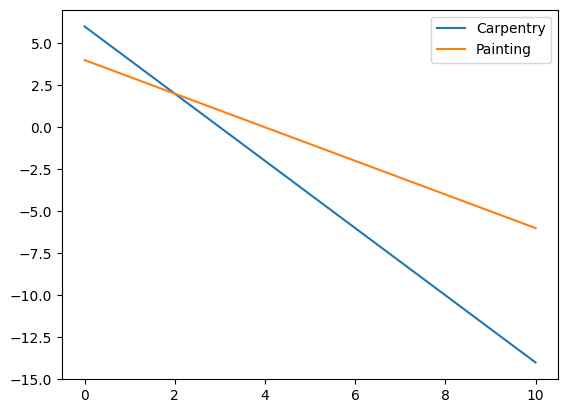

In [5]:
#Plot the constraints
plt.plot(x,y1,label='Carpentry')
plt.plot(x,y2,label='Painting')
plt.legend()
plt.show()

(0.0, 5.0)

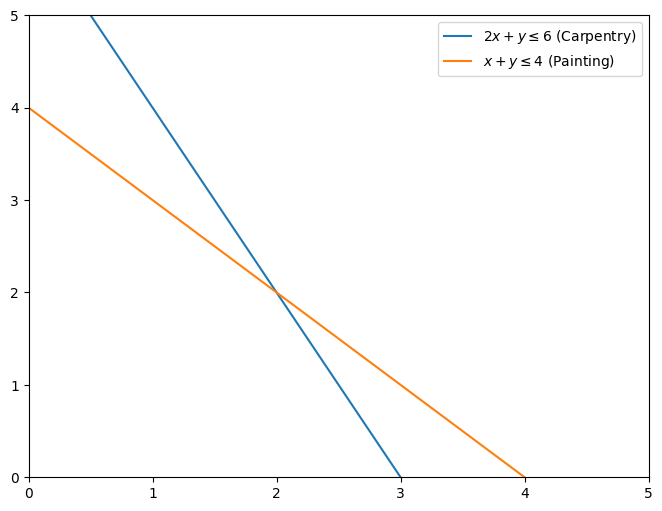

In [6]:
# Plot the constraints
plt.figure(figsize=(8, 6))
plt.plot(x, y1, label=r'$2x+y \leq 6$ (Carpentry)')
plt.plot(x, y2, label=r'$x+y \leq 4$ (Painting)')
plt.legend()
plt.xlim(0, 5)
plt.ylim(0, 5)


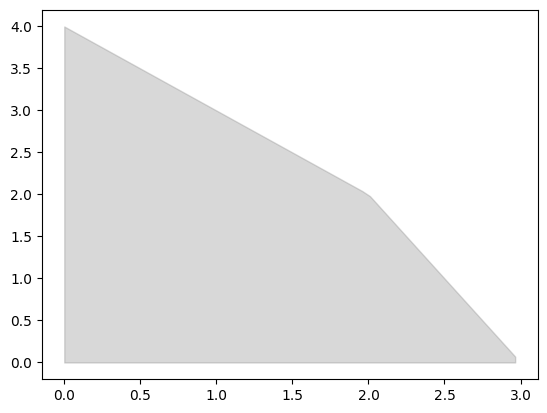

In [7]:
## Feasible Region
plt.fill_between(x, np.minimum(y1, y2), 0, where=(np.minimum(y1, y2) >= 0),
                 color='gray', alpha=0.3, label='Feasible Region')


In [8]:
#Corner points from the feasible region
points = [(0,0), (0,4), (2, 2.2), (3,0)]

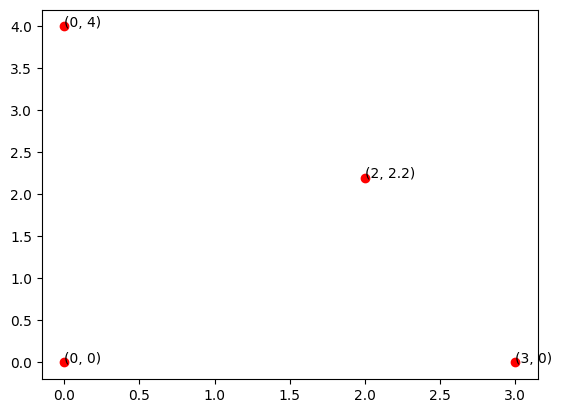

In [9]:
#plot points
for point in points:
  plt.plot(point[0], point[1], 'ro')
  plt.text(point[0], point[1], f'{point}')

In [16]:
max_index=np.argmax(profits)
best_point=points[max_profit_index]
max_profit=profits[max_profit_index]
print('Maximum profit:',max_profit,'at point:',best_point)

Maximum profit: 104.0 at point: (2, 2.2)


In [17]:
best_point

(2, 2.2)

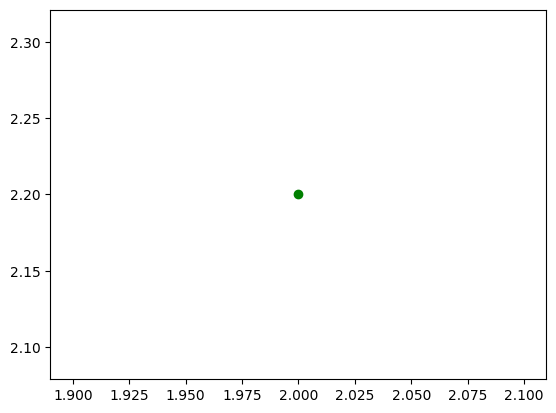

In [18]:
plt.plot(best_point[0], best_point[1], 'go', label=f'Maximum Profit={max_profit} at {best_point}')
#plt.text(best_point[0], best_point[1], f'Best Point')

2. Maximize:

Z=40x1+30x2+20x3

Subject to:

2x1+1x2+1x3≤100 (M1)

1x1+2x2+1x3≤80 (M2)

xi≥0



In [19]:
from scipy.optimize import linprog

In [20]:
#create coefficients for maximization
c = [-40, -30, -20]

In [21]:
#Coefficients of constraints (Ax<=b)
A=[[2,2,1],
   [1,2,1]]

b=[100,80]

In [22]:


#Bounds for x1, x2, and x3
x_bounds = [(0, None),(0, None), (0, None)]

In [23]:
#solve using simplex method
result=linprog(c, A_ub=A, b_ub=b, bounds=x_bounds, method='highs')
result

        message: Optimization terminated successfully. (HiGHS Status 7: Optimal)
        success: True
         status: 0
            fun: -2000.0
              x: [ 2.000e+01  0.000e+00  6.000e+01]
            nit: 2
          lower:  residual: [ 2.000e+01  0.000e+00  6.000e+01]
                 marginals: [ 0.000e+00  1.000e+01  0.000e+00]
          upper:  residual: [       inf        inf        inf]
                 marginals: [ 0.000e+00  0.000e+00  0.000e+00]
          eqlin:  residual: []
                 marginals: []
        ineqlin:  residual: [ 0.000e+00  0.000e+00]
                 marginals: [-2.000e+01 -0.000e+00]
 mip_node_count: 0
 mip_dual_bound: 0.0
        mip_gap: 0.0

In [24]:
print("Optimal values of x1, x2, x3: ", result.x)

Optimal values of x1, x2, x3:  [20.  0. 60.]


In [25]:
print("Maximum profit: ", -result.fun)

Maximum profit:  2000.0


3. Supply: [30, 40, 20] (3 sources)

  Demand: [20, 30, 25, 15] (4 destinations)

  Cost Matrix (3×4):

  8, 6, 10, 9

  9, 7,  4, 2

  3, 4,  2, 5

In [26]:
#Transport Cost
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
supply = [30,40,20]
demand = [20,30,25,15]
cost = np.array([[8,6,10,9],
                 [9,7,4,2],
                 [3,4,2,5]])

In [28]:
def transport_corner(supply, demand, cost):
  supply = supply.copy()
  demand = demand.copy()
  m,n = len(supply), len(demand)
  allocation = np.zeros((m,n), dtype=int)
  i = j = 0
  while i < m and j < n:
    alloc = min(supply[i], demand[j])
    allocation[i, j] = alloc
    supply[i] -= alloc
    demand[j] -= alloc
    i+=1
elif demand[j] ==0
j+=1
total_cost=np.sum(allocation*cost)
return allocation, total_cost

SyntaxError: invalid syntax (<ipython-input-28-9a55bbb2154a>, line 13)

In [29]:
import numpy as np

def transport_corner(supply, demand, cost):
    supply = supply.copy()
    demand = demand.copy()
    m, n = len(supply), len(demand)
    allocation = np.zeros((m, n), dtype=int)
    i = j = 0

    while i < m and j < n:
        alloc = min(supply[i], demand[j])
        allocation[i, j] = alloc
        supply[i] -= alloc
        demand[j] -= alloc

        if supply[i] == 0 and demand[j] == 0:
            i += 1
            j += 1
        elif supply[i] == 0:
            i += 1
        elif demand[j] == 0:
            j += 1

    total_cost = np.sum(allocation * cost)
    return allocation, total_cost
alloc, total_cost=transport_corner(supply, demand, cost)

In [30]:
alloc

array([[20, 10,  0,  0],
       [ 0, 20, 20,  0],
       [ 0,  0,  5, 15]])

In [31]:
print("Allocation Matrix:\n", pd.DataFrame(alloc))

Allocation Matrix:
     0   1   2   3
0  20  10   0   0
1   0  20  20   0
2   0   0   5  15
